| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./06_Prueba_de_Importancia.ipynb)| [⏩](./08_comparaciones_multiples.ipynb)|

# **07 Análisis de varianza unidireccional (ANOVA)**

Este módulo cubre los fundamentos del ANOVA y cómo funcionan las pruebas F en ejemplos de ANOVA unidireccional.

## **7.1 Comparación de varias medias**

La comparación de varias medias se realiza frecuentemente en estadística para determinar si existen diferencias significativas entre las medias de tres o más grupos. Este análisis se puede llevar a cabo mediante **ANOVA** (Análisis de Varianza), específicamente mediante el ANOVA de un factor cuando se quiere comparar las medias de grupos basados en un solo factor de clasificación.

**ANOVA de un Factor**

El **ANOVA de un factor** se utiliza para comparar las medias de dos o más grupos para determinar si al menos uno de los grupos difiere significativamente de los demás. El ANOVA se basa en la comparación de la variabilidad entre los grupos con la variabilidad dentro de los grupos.

**Hipótesis en ANOVA de un Factor:**

- **Hipótesis Nula $(H_0)$**: Todas las medias de los grupos son iguales $(\mu_1 = \mu_2 = \cdots = \mu_k)$.
- **Hipótesis Alternativa $(H_a)$**: Al menos una de las medias de los grupos es diferente.

**Fórmula del Estadístico F en ANOVA:**

$F = \frac{MS_{entre}}{MS_{dentro}}$

Donde:

- $(MS_{entre})$ (Mean Square Between) es la varianza entre los grupos, y se calcula dividiendo la suma cuadrada entre los grupos $(SS_{entre})$ por sus grados de libertad $(k-1)$, donde $(k)$ es el número de grupos.

- $(MS_{dentro})$ (Mean Square Within) es la varianza dentro de los grupos, y se calcula dividiendo la suma cuadrada dentro de los grupos $(SS_{dentro})$ por sus grados de libertad $(N-k)$, donde $(N)$ es el número total de observaciones.

**Ejemplo: Comparación de las Medias de Tres Grupos**

Supongamos que queremos comparar las puntuaciones (por ejemplo, puntuaciones de satisfacción) de tres diferentes grupos de clientes para determinar si hay diferencias significativas entre ellos. Generaremos datos simulados para estos tres grupos y aplicaremos ANOVA de un factor.

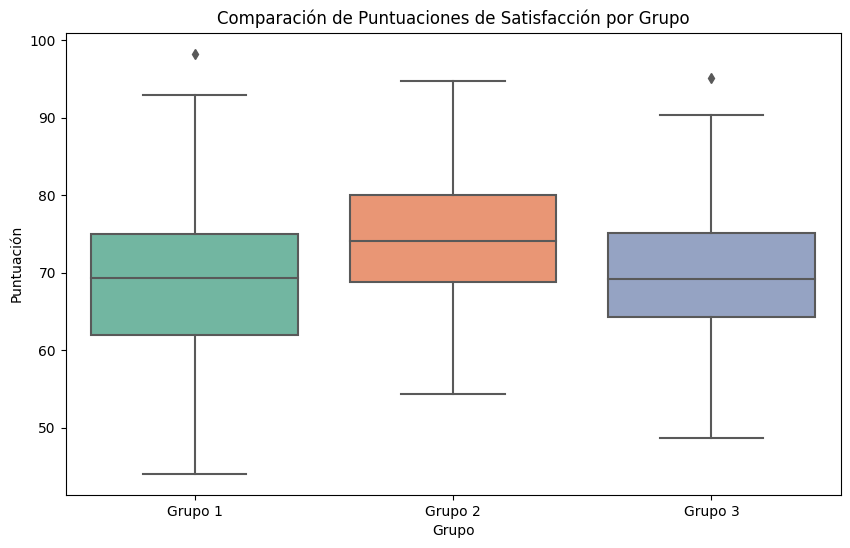

(3.306880775198393, 0.03937404184902142)

In [1]:
from scipy.stats import f_oneway
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generando datos simulados para tres grupos
np.random.seed(25)
grupo_1 = np.random.normal(70, 10, 50)  # Grupo 1: media=70, sd=10, n=50
grupo_2 = np.random.normal(75, 10, 50)  # Grupo 2: media=75, sd=10, n=50
grupo_3 = np.random.normal(70, 10, 50)  # Grupo 3: media=70, sd=10, n=50

# Creando DataFrame para análisis
df_anova = pd.DataFrame({
    'Puntuación': np.concatenate([grupo_1, grupo_2, grupo_3]),
    'Grupo': ['Grupo 1']*50 + ['Grupo 2']*50 + ['Grupo 3']*50
})

# Realizando ANOVA de un factor
f_stat, p_valor = f_oneway(grupo_1, grupo_2, grupo_3)

# Visualización de las puntuaciones por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Puntuación', data=df_anova, palette='Set2')
plt.title('Comparación de Puntuaciones de Satisfacción por Grupo')
plt.show()

(f_stat, p_valor)

La prueba ANOVA de un factor produce un estadístico $(F)$ de aproximadamente $(3.31)$ y un valor $(p)$ de aproximadamente $(0.039)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, existe al menos una diferencia significativa entre las medias de los grupos de clientes.

El gráfico muestra las distribuciones de las puntuaciones de satisfacción para los tres grupos mediante diagramas de caja, los cuales resaltan las medianas, los rangos intercuartílicos y los posibles valores atípicos. La diferencia en las medias de los grupos, especialmente entre el Grupo 2 y los otros dos grupos, es lo que contribuye a la significancia estadística encontrada en el análisis ANOVA.

Este resultado sugiere que las percepciones de satisfacción difieren entre al menos uno de los grupos de clientes comparados. El análisis ANOVA de un factor nos permite concluir que no todas las medias de grupo son iguales, pero no especifica cuáles grupos difieren entre sí. Para determinar específicamente entre qué grupos existen diferencias significativas, serían necesarios análisis post-hoc como la prueba de Tukey.

Este ejemplo demuestra cómo se puede utilizar ANOVA para comparar las medias entre varios grupos y determinar si las diferencias observadas son estadísticamente significativas, proporcionando insights valiosos en contextos de investigación y toma de decisiones basada en datos.

## **7.2 La idea del análisis de la varianza**

El **Análisis de Varianza (ANOVA)** es un conjunto de modelos estadísticos y sus procedimientos asociados, utilizados para analizar las diferencias entre las medias de tres o más grupos. Basado en el concepto de descomposición de varianza, el ANOVA proporciona una forma de comparar las varianzas internas de los grupos con la varianza entre los grupos, para determinar si las diferencias en las medias de los grupos son mayores de lo que se esperaría por casualidad.

**Conceptos Clave en ANOVA**

- **Suma de Cuadrados Total (SST):** La variabilidad total en los datos, respecto a la media general de todos los datos.
- **Suma de Cuadrados Entre Grupos (SSE):** La variabilidad debido a las diferencias entre las medias de los grupos.
- **Suma de Cuadrados Dentro de Grupos (SSW):** La variabilidad dentro de cada grupo, respecto a la media del grupo.

**Fórmulas Clave**

- **Suma de Cuadrados Total (SST):**

  $SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$

  donde $(y_i)$ es cada valor individual y $(\bar{y})$ es la media general de todos los datos.

- **Suma de Cuadrados Entre Grupos (SSE):**

  $SSE = \sum_{j=1}^{k} n_j (\bar{y}_j - \bar{y})^2$

  donde $(n_j)$ es el número de observaciones en el grupo $(j)$, $(\bar{y}_j)$ es la media del grupo $(j)$, y $(k)$ es el número total de grupos.

- **Suma de Cuadrados Dentro de Grupos (SSW):**

  $SSW = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (y_{ij} - \bar{y}_j)^2$

  donde $(y_{ij})$ es el valor de la observación $(i)$ en el grupo $(j)$.

- **Estadístico F:**

  $F = \frac{MS_{entre}}{MS_{dentro}}$

  donde $(MS_{entre} = SSE / (k-1))$ y $(MS_{dentro} = SSW / (N-k))$, con $(N)$ siendo el número total de observaciones.

**Ejemplo: ANOVA para Comparar Medias de Tres Grupos**

Realizaremos un ANOVA de un factor para comparar las medias de tres grupos diferentes de datos, simulando puntuaciones para ilustrar cómo el ANOVA puede utilizarse para determinar si hay diferencias significativas entre los grupos.

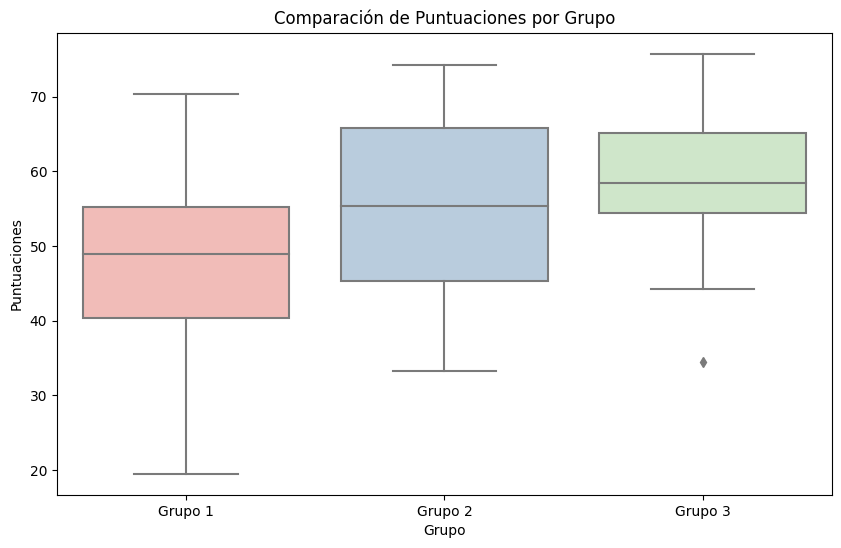

(7.911309304711114, 0.0006969967944128918)

In [2]:
# Generando datos simulados para tres grupos
grupo_1_puntuaciones = np.random.normal(50, 10, 30)  # Grupo 1
grupo_2_puntuaciones = np.random.normal(55, 10, 30)  # Grupo 2
grupo_3_puntuaciones = np.random.normal(60, 10, 30)  # Grupo 3

# Creando un DataFrame con los datos
df_anova_ejemplo = pd.DataFrame({
    'Puntuacion': np.concatenate([grupo_1_puntuaciones, grupo_2_puntuaciones, grupo_3_puntuaciones]),
    'Grupo': ['Grupo 1'] * 30 + ['Grupo 2'] * 30 + ['Grupo 3'] * 30
})

# Realizando ANOVA de un factor con scipy.stats
f_stat_ejemplo, p_valor_ejemplo = f_oneway(grupo_1_puntuaciones, grupo_2_puntuaciones, grupo_3_puntuaciones)

# Visualización de las puntuaciones por grupo mediante un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Puntuacion', data=df_anova_ejemplo, palette='Pastel1')
plt.title('Comparación de Puntuaciones por Grupo')
plt.ylabel('Puntuaciones')
plt.xlabel('Grupo')
plt.show()

(f_stat_ejemplo, p_valor_ejemplo)

La prueba ANOVA de un factor produce un estadístico $(F)$ de aproximadamente $(7.91)$ y un valor $(p)$ de aproximadamente $(0.0007)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, existen diferencias significativas entre las medias de los grupos.

El gráfico de cajas muestra la distribución de las puntuaciones para los tres grupos. Las diferencias visuales en las medianas y los rangos intercuartílicos entre los grupos apoyan el resultado de la prueba ANOVA, indicando que las puntuaciones varían significativamente entre los grupos.

Este ejemplo ilustra cómo el análisis de varianza (ANOVA) permite comparar las medias entre varios grupos y determinar si las diferencias observadas son estadísticamente significativas. Este método es fundamental en la investigación para evaluar el efecto de las variables categóricas sobre una variable continua, proporcionando insights valiosos en muchos campos, como la medicina, la psicología y la investigación de mercados.

## **7.3 Uso de la distribución F para evaluar ANOVA**

El uso de la **distribución $(F)$** para evaluar ANOVA (Análisis de Varianza) se basa en la comparación de varianzas para determinar si las diferencias entre las medias de varios grupos son estadísticamente significativas. La distribución $(F)$ es una distribución de probabilidad que surge al considerar la razón de dos estimaciones independientes de varianza de dos poblaciones normales. En el contexto de ANOVA, se utiliza para calcular el valor $(p)$ asociado con el estadístico $(F)$, que a su vez se usa para probar la hipótesis nula de que todas las medias del grupo son iguales.

**Estadístico $(F)$ en ANOVA de un Factor**

El estadístico $(F)$ se calcula como la razón entre la varianza entre grupos (cuánto difieren las medias de los grupos entre sí) y la varianza dentro de los grupos (cuánto difieren las observaciones dentro de cada grupo). La fórmula del estadístico $(F)$ es:

$F = \frac{MS_{entre}}{MS_{dentro}}$

Donde:

- $(MS_{entre} = \frac{SS_{entre}}{df_{entre}})$

 es el cuadrado medio entre los grupos, con $(SS_{entre})$ siendo la suma de cuadrados entre los grupos y $(df_{entre} = k - 1)$ los grados de libertad entre los grupos $(k)$ es el número de grupos.

- $(MS_{dentro} = \frac{SS_{dentro}}{df_{dentro}})$

 es el cuadrado medio dentro de los grupos, con $(SS_{dentro})$ siendo la suma de cuadrados dentro de los grupos y $(df_{dentro} = N - k)$ los grados de libertad dentro de los grupos $(N)$ es el número total de observaciones.

**Ejemplo: Uso de la Distribución $(F)$ en ANOVA**

Generaremos datos simulados para tres grupos con diferentes medias y aplicaremos ANOVA de un factor para determinar si las diferencias entre las medias de los grupos son estadísticamente significativas, utilizando la distribución $(F)$ para evaluar el resultado.

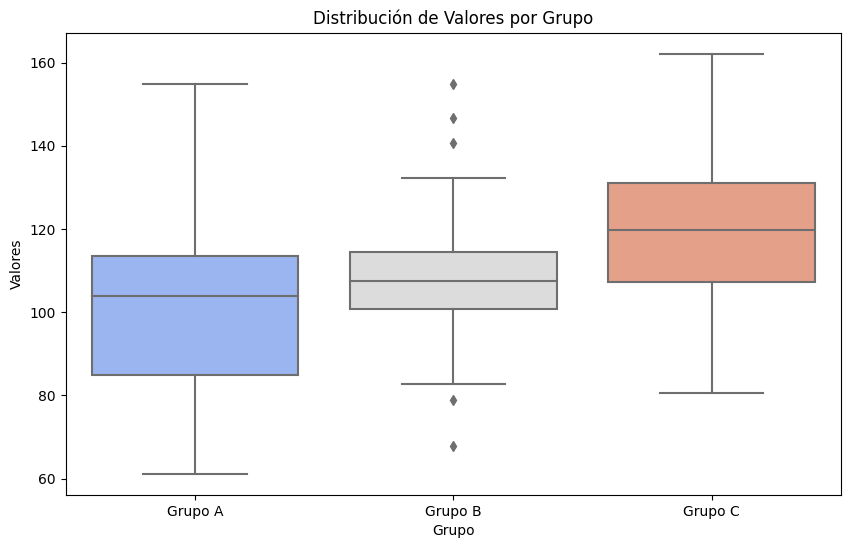

(9.202422234195721, 0.00019421020922486584)

In [3]:
# Generando datos simulados para tres grupos con diferentes medias
np.random.seed(26)
grupo_a = np.random.normal(100, 20, 40)  # Grupo A
grupo_b = np.random.normal(110, 20, 40)  # Grupo B
grupo_c = np.random.normal(120, 20, 40)  # Grupo C

# Creando DataFrame para el análisis ANOVA
df_f_dist = pd.DataFrame({
    'Valor': np.concatenate([grupo_a, grupo_b, grupo_c]),
    'Grupo': ['Grupo A']*40 + ['Grupo B']*40 + ['Grupo C']*40
})

# Realizando ANOVA de un factor
f_stat, p_valor = f_oneway(grupo_a, grupo_b, grupo_c)

# Visualización de los resultados mediante un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Valor', data=df_f_dist, palette='coolwarm')
plt.title('Distribución de Valores por Grupo')
plt.ylabel('Valores')
plt.xlabel('Grupo')
plt.show()

(f_stat, p_valor)

La prueba ANOVA de un factor produce un estadístico $(F)$ de aproximadamente $(9.20)$ y un valor $(p)$ muy pequeño $(0.00019)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, existen diferencias estadísticamente significativas entre las medias de los tres grupos.

El gráfico de cajas muestra la distribución de valores para los grupos A, B y C, destacando las diferencias en las medianas y los rangos intercuartílicos entre los grupos. La significancia estadística encontrada a través del análisis ANOVA sugiere que no todas las medias del grupo son iguales.

Este resultado demuestra cómo el ANOVA utiliza la distribución $(F)$ para evaluar la significancia de las diferencias entre las medias de varios grupos. Al comparar la variación entre los grupos con la variación dentro de los grupos, ANOVA ayuda a determinar si las diferencias observadas en las medias de los grupos son más grandes de lo que se esperaría por casualidad, proporcionando una herramienta valiosa para explorar las relaciones entre una variable dependiente continua y una variable independiente categórica en diversos campos de estudio.

## **7.4 Más sobre ANOVA**

El **Análisis de Varianza (ANOVA)** es una técnica estadística utilizada para comparar las medias de tres o más muestras, para determinar si al menos una media es significativamente diferente de las demás. El ANOVA se basa en la comparación de la variación entre las muestras con la variación dentro de las muestras.

**Componentes Clave del ANOVA**

- **Suma de Cuadrados Total (SST):** La variabilidad total en los datos.
- **Suma de Cuadrados Entre Grupos (SSE o SSB):** La variabilidad debido a las diferencias entre las medias de los grupos.
- **Suma de Cuadrados Dentro de Grupos (SSW o SSR):** La variabilidad dentro de los grupos.

**Fórmulas Principales**

- **Suma de Cuadrados Total (SST):**

$SST = \sum (y_{ij} - \bar{y}_{..})^2$

donde $(y_{ij})$ es el valor de la observación $(j)$ en el grupo $(i)$, y $(\bar{y}_{..})$ es la media total de todas las observaciones.

- **Suma de Cuadrados Entre Grupos (SSE):**

$SSE = \sum n_i (\bar{y}_{i.} - \bar{y}_{..})^2$

donde $(n_i)$ es el número de observaciones en el grupo $(i)$, y $(\bar{y}_{i.})$ es la media del grupo $(i)$.

- **Suma de Cuadrados Dentro de Grupos (SSW):**

$SSW = \sum (y_{ij} - \bar{y}_{i.})^2$

- **Estadístico \(F\):**

$F = \frac{MS_{entre}}{MS_{dentro}}$

donde $(MS_{entre} = \frac{SSE}{df_{entre}})$ y $(MS_{dentro} = \frac{SSW}{df_{dentro}})$, con $(df_{entre} = k - 1)$ y $(df_{dentro} = N - k)$.

**Ejemplo: ANOVA con Datos Simulados**

Crearemos datos simulados para tres grupos, realizaremos ANOVA para comparar las medias de estos grupos y visualizaremos los resultados. Este ejemplo ilustrará cómo ANOVA puede ser usado para evaluar si las diferencias entre las medias de los grupos son estadísticamente significativas.

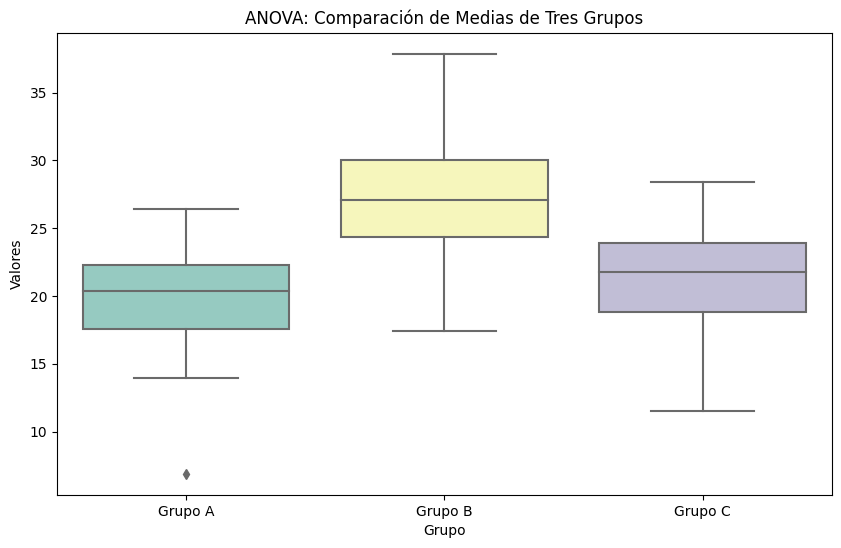

(22.978442141305486, 9.720003360490798e-09)

In [4]:
# Definiendo los datos para tres grupos diferentes
np.random.seed(27)
data = {
    "Grupo A": np.random.normal(loc=20, scale=5, size=30),
    "Grupo B": np.random.normal(loc=25, scale=5, size=30),
    "Grupo C": np.random.normal(loc=22, scale=5, size=30)
}

# Creando un DataFrame para facilitar el análisis
df_anova = pd.DataFrame(data)

# Derretir el DataFrame para tener una columna de grupos y una de valores
df_melted = df_anova.melt(var_name='Grupo', value_name='Valor')

# Realizando ANOVA de un factor con scipy.stats
f_stat, p_valor = f_oneway(df_anova['Grupo A'], df_anova['Grupo B'], df_anova['Grupo C'])

# Visualización de los resultados mediante un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Valor', data=df_melted, palette='Set3')
plt.title('ANOVA: Comparación de Medias de Tres Grupos')
plt.ylabel('Valores')
plt.xlabel('Grupo')
plt.show()

# Mostrando el estadístico F y el valor p
(f_stat, p_valor)

La prueba ANOVA de un factor produce un estadístico $(F)$ de aproximadamente $(22.98)$ y un valor $(p)$ muy pequeño $(9.72 \times 10^{-9})$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, existen diferencias estadísticamente significativas entre las medias de los tres grupos.

El gráfico de cajas ilustra claramente las diferencias en las distribuciones de los valores para los grupos A, B y C, con variaciones notables en las medianas y en los rangos intercuartílicos. Este resultado sugiere que al menos uno de los grupos tiene una media significativamente diferente de los otros, lo que justifica un análisis más detallado, posiblemente utilizando pruebas post-hoc para identificar específicamente entre qué grupos existen diferencias significativas.

Este ejemplo demuestra el poder del ANOVA para detectar diferencias entre las medias de varios grupos, proporcionando una herramienta valiosa para investigar cómo una o más variables categóricas afectan una variable dependiente continua. La significancia estadística encontrada a través del análisis ANOVA nos ayuda a entender mejor las relaciones subyacentes en los datos y a formular conclusiones informadas basadas en el análisis.

## **7.5 Análisis de varianza unidireccional**

El **Análisis de Varianza Unidireccional (ANOVA unifactorial)** es una técnica estadística utilizada para comparar las medias de tres o más grupos independientes para determinar si existen diferencias estadísticamente significativas entre ellas. Es especialmente útil cuando se quiere probar la hipótesis de que diferentes categorías o tratamientos tienen el mismo efecto en una variable de respuesta.

**Concepto Básico del ANOVA Unidireccional**

El ANOVA unidireccional se basa en la descomposición de la variabilidad total observada en los datos en componentes atribuibles a diferentes fuentes:

- **Variabilidad dentro de los grupos**: Variación debido a diferencias dentro de grupos individuales.

- **Variabilidad entre grupos**: Variación debido a diferencias entre las medias de los grupos.

La idea es comparar la variabilidad media entre los grupos con la variabilidad media dentro de los grupos. Si la variabilidad entre grupos es significativamente mayor que la variabilidad dentro de los grupos, entonces se concluye que no todos los grupos tienen la misma media.

**Hipótesis en ANOVA**

- **Hipótesis Nula $(H_0)$**: Las medias de todos los grupos son iguales.

- **Hipótesis Alternativa $(H_a)$**: Al menos una media de grupo es diferente.

**Fórmula del Estadístico F**

El estadístico utilizado en ANOVA unidireccional es el ratio F, que se calcula como:

$F = \frac{\text{Varianza entre grupos}}{\text{Varianza dentro de los grupos}}$

donde:

- **Varianza entre grupos**: $\text{MSB} = \frac{SSB}{df_{entre}}$

- **Varianza dentro de los grupos**: $\text{MSW} = \frac{SSW}{df_{dentro}}$

y $(SSB)$ y $(SSW)$ son la suma de cuadrados entre grupos y dentro de grupos, respectivamente. $(df)$ son los grados de libertad.

**Ejemplo Práctico: Comparación de Tres Métodos de Enseñanza**

Supongamos que queremos evaluar si tres métodos de enseñanza diferentes tienen un impacto significativo en el rendimiento de los estudiantes en un examen.

**Datos Simulados**

- **Método A**: [88, 92, 75, 89, 90]

- **Método B**: [85, 84, 89, 87, 86]

- **Método C**: [80, 83, 77, 79, 78]

**Implementación en Python**

Vamos a calcular el ANOVA unidireccional para estos datos.

Estadístico F: 4.63
Valor-p: 0.0323


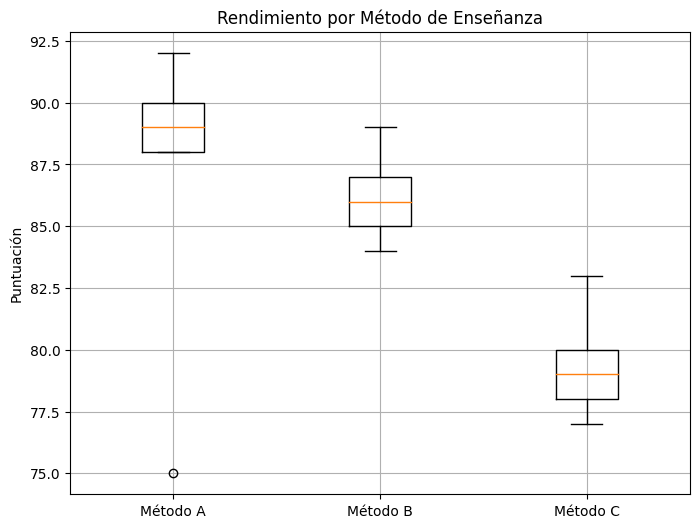

In [5]:
import scipy.stats as stats
import numpy as np

# Datos
A = np.array([88, 92, 75, 89, 90])
B = np.array([85, 84, 89, 87, 86])
C = np.array([80, 83, 77, 79, 78])

# Análisis de Varianza (ANOVA)
F, p = stats.f_oneway(A, B, C)

print(f"Estadístico F: {F:.2f}")
print(f"Valor-p: {p:.4f}")

# Visualización de los resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot([A, B, C], labels=['Método A', 'Método B', 'Método C'])
plt.title('Rendimiento por Método de Enseñanza')
plt.ylabel('Puntuación')
plt.grid(True)
plt.show()

**Interpretación**

- **Estadístico F**: Indica cuánto mayor es la variabilidad entre los grupos comparada con la variabilidad dentro de los grupos. Un valor F alto sugiere diferencias significativas entre las medias de los grupos.

- **Valor-p**: Proporciona la probabilidad de observar un valor F al menos tan extremo como el obtenido si la hipótesis nula fuera cierta. Un valor $(p)$ pequeño $(<0.05)$ lleva a rechazar la hipótesis nula, indicando que al menos una de las medias de grupo difiere significativamente de las otras.

El gráfico de cajas muestra las distribuciones de puntuaciones para cada método de enseñanza, facilitando la visualización de diferencias entre los grupos.

Este análisis de ANOVA proporciona una forma rigurosa y estadísticamente válida de comparar múltiples grupos, y es ampliamente utilizado en experimentos científicos, estudios de mercado, y más.

| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./06_Prueba_de_Importancia.ipynb)| [⏩](./08_comparaciones_multiples.ipynb)|